In [1]:
import pandas as pd
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display

In [2]:
df_le_age = pd.read_csv('full-data/life_expectancy_by_age.csv')
df_death = pd.read_csv('full-data/number_of_deaths_by_age_group.csv')

In [3]:
all_year_3 = sorted(df_le_age.Year.unique(), reverse=False)
all_text_3 = df_le_age.Entity.unique()
all_text_3 = [str(i) for i in all_text_3]

In [4]:
# line chart
def show_line_chart_age(year, country):
    fig = plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,1,1)
    x_labels_temp = [1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2021]
    x_labels_official = []
    for i in x_labels_temp:
        if i <= year - 5:
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    y_labels = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78]
    colors = {'0-9':'#000000', '10-19':'#3cb44b', '20-29':'#ffe119', '30-39':'#4363d8', '40-49':'#f58231',
              '50-59':'#911eb4', '60-69':'#42d4f4', '70-79':'#aaffc3', '80+':'#fabed4'}
    tmp = df_le_age.loc[(df_le_age['Entity'] == country) & (df_le_age['Year'] <= year), ['Year', 'AgeGrp', 'Life_exp_re']]
    tmp_groups = tmp.groupby('AgeGrp')
    for key, df_local in tmp_groups:
        x = df_local.Year.tolist()
        y = df_local.Life_exp_re.tolist()
        ax1.plot(x, y, '.-', color=colors[key], label=key)
    # set up plot
    ax1.set_title("Số năm kỳ vọng còn lại, theo các nhóm tuổi khác nhau, tại " + country)
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    plt.ylabel("Số năm kỳ vọng còn lại")
    plt.legend(loc = "upper left")
    plt.show()

In [5]:
# Create the animation widget
animation5 = ipywidgets.interact(show_line_chart_age, 
                                 year=ipywidgets.SelectionSlider(value=2021, description='Year',   options=all_year_3), 
                                 country=ipywidgets.Combobox(value='World', options=all_text_3, description='Country:', ensure_option=True,disabled=False))
animation5.interval = 0.01
# Display the animation widget
display(animation5)

interactive(children=(SelectionSlider(description='Year', index=71, options=(1950, 1951, 1952, 1953, 1954, 195…

<function __main__.show_line_chart_age(year, country)>

In [6]:
all_year_6 = sorted(df_death.Year.unique())
all_text_6 = ['World', 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
all_mode_2 = ['Relative', 'Total']
all_age_groups_2 = ['0-4', '5-14', '15-49', '50-69', '70+', 'All']

def show_stack_plot_death(year, text, mode, age_grp='All'):
    # chọn màu cho hợp lý
    cs = {'0-4':'#3cb44b', '5-14':'#ffe119', '15-49':'#4363d8', '50-69':'#f58231', '70+':'#aaffc3'}
    x_labels_temp = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
    x_labels_official = []
    if mode =='Total':
        y_labels = [0, 10, 20, 30, 40, 50, 60]
    else:
        y_labels = [0, 20, 40, 60, 80, 100]
    for i in x_labels_temp:
        if i < year - 1 or (i == 1990):
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    small_grouped_df = df_death.groupby('Entity')
    fig = plt.figure(figsize=(10, 6))
    ax1 = plt.subplot(1,1,1)
    arr1, arr2, arr3, arr4, arr5, y = [], [], [], [], [], []
    for key, df_local in small_grouped_df:
        if key == text:
            tmp = df_local.loc[df_local['Year'] <= year, ['Year', '0-4', '5-14', '15-49', '50-69', '70+']]
            arr1 = tmp['0-4'].tolist()
            arr1 = list(np.array(arr1) / 1000000)
            arr2 = tmp['5-14'].tolist()
            arr2 = list(np.array(arr2) / 1000000)
            arr3 = tmp['15-49'].tolist()
            arr3 = list(np.array(arr3) / 1000000)
            arr4 = tmp['50-69'].tolist()
            arr4 = list(np.array(arr4) / 1000000)
            arr5 = tmp['70+'].tolist()
            arr5 = list(np.array(arr5) / 1000000)
            y = tmp['Year'].tolist()
    label = list(cs.keys())
    color = list(cs.values())
    if age_grp != 'All':
        for i in range(len(label)):
            if label[i] != age_grp:
                label[i] = None
                color[i] = '#EEEEEE'
    if mode == 'Total':
        ax1.stackplot(y, arr1, arr2, arr3, arr4, arr5, labels = label, colors = color)
    else:
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        arr3 = np.array(arr3)
        arr4 = np.array(arr4)
        arr5 = np.array(arr5)
        arrr = np.row_stack((arr1, arr2, arr3, arr4, arr5))
        percent = arrr /  arrr.sum(axis=0).astype(float) * 100 
        ax1.stackplot(y, percent, labels = label, colors = color)
    # set up plot
    ax1.set_title("Số lượng tử vong theo nhóm tuổi, từ 1990 đến " + str(year))
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    if mode == 'Total':
        plt.ylabel("Số lượng người tử vong (đv: triệu người)")
    else:
        plt.ylabel("Số lượng người tử vong (tính theo phần trăm %)")
    plt.legend(loc = "upper left")
    plt.show()

In [7]:
# Create the animation widget
animation8 = ipywidgets.interact(show_stack_plot_death, 
                                 year=ipywidgets.SelectionSlider(value=2019, description='Year', options=all_year_6),
                                 text=ipywidgets.Combobox(value='World', options=all_text_6, description='What:', ensure_option=True,disabled=False),
                                 mode=ipywidgets.Combobox(value='Total', options=all_mode_2, description='Mode:', ensure_option=True,disabled=False),
                                 age_grp=ipywidgets.Combobox(value='All', options=all_age_groups_2, description='Age Group:', ensure_option=True,disabled=False))
# Display the animation widget
display(animation8)

interactive(children=(SelectionSlider(description='Year', index=29, options=(1990, 1991, 1992, 1993, 1994, 199…

<function __main__.show_stack_plot_death(year, text, mode, age_grp='All')>

In [8]:
df_sur_female = pd.read_csv('full-data/survival_female.csv')
df_sur_male = pd.read_csv('full-data/survival_male.csv')

In [9]:
df_survival = pd.concat([df_sur_female, df_sur_male]).drop(['Unnamed: 8'], axis=1).rename(columns={'Exact age (years)': 'Age'})

In [10]:
age_list = df_survival['Age'].tolist()

In [11]:
df_survival = df_survival.groupby(['Age']).agg('mean')/1000

In [12]:
df_survival

,1841,1900,1925,1950,1980,2000,2020
Age,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,85.003600,84.608355,92.603480,97.025035,98.795300,99.441225,99.616835
2,79.798010,80.306425,90.538495,96.655630,98.715615,99.403295,99.598215
3,77.103220,78.665785,89.630160,96.497540,98.665010,99.381410,99.586545
4,75.338710,77.615705,89.057240,96.389690,98.630365,99.361980,99.577110
...,...,...,...,...,...,...,...
106,0.000335,0.000125,0.000335,0.002190,0.023050,0.043345,0.060260
107,0.000160,0.000050,0.000170,0.001095,0.013985,0.022605,0.032755
108,0.000075,0.000025,0.000080,0.000545,0.007575,0.011475,0.017135


In [13]:
list_1841 = df_survival['1841'].tolist()
list_1900 = df_survival['1900'].tolist()
list_1925 = df_survival['1925'].tolist()
list_1950 = df_survival['1950'].tolist()
list_1980 = df_survival['1980'].tolist()
list_2000 = df_survival['2000'].tolist()
list_2020 = df_survival['2020'].tolist()

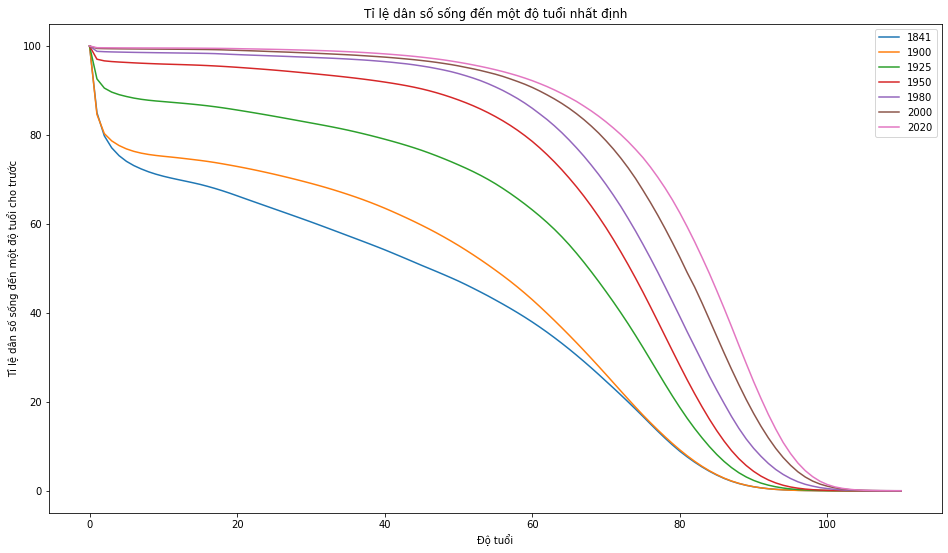

In [14]:
plt.figure(figsize=(16,9))

plt.plot(np.arange(0, 111, step=1), list_1841, label = '1841')
plt.plot(np.arange(0, 111, step=1), list_1900, label = '1900')
plt.plot(np.arange(0, 111, step=1), list_1925, label = '1925')
plt.plot(np.arange(0, 111, step=1), list_1950, label = '1950')
plt.plot(np.arange(0, 111, step=1), list_1980, label = '1980')
plt.plot(np.arange(0, 111, step=1), list_2000, label = '2000')
plt.plot(np.arange(0, 111, step=1), list_2020, label = '2020')

plt.ylabel("Tỉ lệ dân số sống đến một độ tuổi cho trước")
plt.xlabel("Độ tuổi")
plt.legend()
plt.title('Tỉ lệ dân số sống đến một độ tuổi nhất định')
plt.show()

In [15]:
df_age_15 = pd.read_csv('full-data/life-expectancy-at-age-15.csv')

In [16]:
df_age_15 = df_age_15.rename(columns={'Life expectancy at 15': 'Expectancy'})

In [17]:
country_list_tmp = ['Italy', 'Spain', 'Sweden', 'United Kingdom', 'China']
df_age_15 = df_age_15[df_age_15['Entity'].isin(country_list_tmp)]

In [18]:
all_year_15 = sorted(df_age_15.Year.unique())
all_text_15 = ['All', 'Italy', 'Spain', 'Sweden', 'United Kingdom', 'China']

In [19]:
def show_line_age_15(year, text):
    faded_color = '#EEEEEE'
    small_grouped_df = df_age_15.groupby('Entity')
    fig = plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,1,1)
    x_labels_temp = [1751, 1800, 1850, 1900, 1950, 2000, 2021]
    x_labels_official = []
    for i in x_labels_temp:
        if i <= year - 20:
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    y_labels = [50, 60, 70, 80, 90]
    colors = {'Italy':'#D1AFE4', 'Spain':'#2587F0', 'Sweden':'#21DA61', 'United Kingdom':'#E9C213', 'China':'#F791C1'}
    if text != 'All':
        for i in colors.keys():
            if i != text:
                colors[i] = faded_color
    x_save, y_save = -1, -1
    save_key = None
    for key, df_local in small_grouped_df:
        tmp = df_local.loc[df_local['Year'] <= year, ['Year', 'Expectancy']]
        x = tmp.Year.values
        y = tmp.Expectancy.values
        if text == 'All':
            ax1.plot(x, y, '.-', color=colors[key], label=key)
        else:
            if key == text:
                save_key = key
                x_save = x
                y_save = y
            else:
                ax1.plot(x, y, '.-', color=colors[key])
    if save_key is not None:
        ax1.plot(x_save, y_save, '.-', color=colors[save_key], label=save_key)
    # set up plot
    ax1.set_title("Life expectancy ở độ tuổi 15 tại Châu Âu, từ năm 1751 đến năm " + str(year))
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    plt.ylabel("Tuổi")
    plt.legend(loc = "upper left")
    plt.show()

In [20]:
# Create the animation widget
animation15 = ipywidgets.interact(show_line_age_15, 
                                 year=ipywidgets.SelectionSlider(description='Year',   options=all_year_15), 
                                 text=ipywidgets.Combobox(value='All', options=all_text_15, description='Mode:', ensure_option=True,disabled=False))
# Set the interval time between frames to 100 milliseconds
animation15.interval = 0.01
# Display the animation widget
display(animation15)

interactive(children=(SelectionSlider(description='Year', options=(1751, 1752, 1753, 1754, 1755, 1756, 1757, 1…

<function __main__.show_line_age_15(year, text)>